#  **Project: Capstone Project 2– part3**

** *This notebook is part 3 of 4. please follow the sequence **

** Capstone 2 Project - Machine learning model and predicting no of trips from a station **

** Prerequite:- please run notebook 1 and 2 in sequence and that will create the csv file required in data folder.

# Machine Learning Models and Predicting no of Trips:-

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import statsmodels.api as sm

from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import math 
from math import sin, cos, sqrt, atan2
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from scipy.stats import probplot, shapiro
from statsmodels.graphics.regressionplots import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split


sns.set()
import warnings
warnings.filterwarnings('ignore')

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Linear Regression Model:-

In [2]:
df_daily_trips = pd.DataFrame(pd.read_csv('../data/df_daily_trips_ML.csv'))
df_daily_trips.head()

,Unnamed: 0,start_id,startdate,total_trip_time,no_of_bikes,no_of_trips,paidunits,free_trip,start_day,median_user_age,paidamount,gender,density_score,AVGT,Members
0,0,72,2017-10-01,105707,98,100,1.0,99,6,35.0,2.5,1.0,473,61.0,246193
1,1,72,2017-10-02,120738,125,131,2.0,130,0,38.0,5.0,1.0,473,65.0,246402
2,2,72,2017-10-03,128572,135,140,3.0,139,1,36.0,7.5,1.0,473,65.0,246566
3,3,72,2017-10-04,146306,152,159,0.0,159,2,36.0,0.0,1.0,473,66.5,246742
4,4,72,2017-10-05,148665,160,162,8.0,160,3,36.5,20.0,1.0,473,75.0,246893


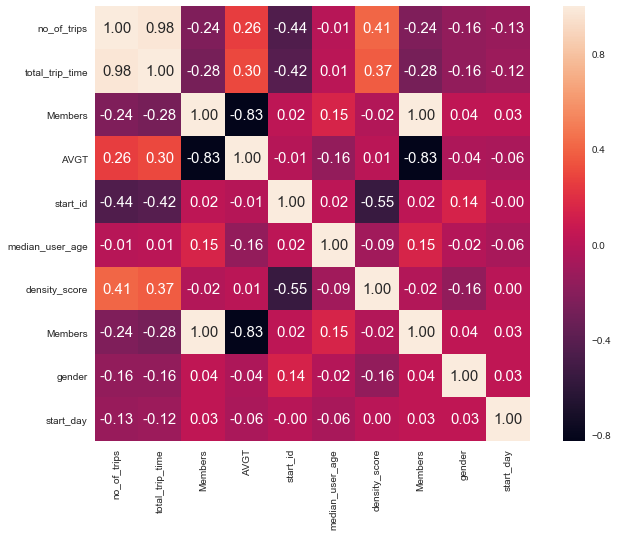

In [3]:
#Heat map of the covariance between features

plt.figure(figsize=(12,8))
cols=['no_of_trips','total_trip_time','Members','AVGT','start_id','median_user_age','density_score','Members','gender','start_day']
cm = np.corrcoef(df_daily_trips[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols,
                xticklabels=cols)
plt.show()


** to predict No of trips No of members, Density score, start station id, Average temprature are most significant Features.**


In [4]:
#ols model to predict no of trips from a station for a given day

model2 = ols('no_of_trips ~  start_id + median_user_age + density_score + AVGT + Members + gender + start_day -1 ', df_daily_trips).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            no_of_trips   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                 1.439e+04
Date:                Sun, 25 Feb 2018   Prob (F-statistic):               0.00
Time:                        12:31:31   Log-Likelihood:            -3.5670e+05
No. Observations:               65730   AIC:                         7.134e+05
Df Residuals:                   65723   BIC:                         7.135e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
start_id           -0.0141      0.000    -

Intercept is very High and since no fo trip and total trip time cannot be negative so remoed the intercept.

The Squared R value of ols model .605

The Akaike Information criteria (AIC) in this model2 is higher.  Lower values of AIC indicate better fitting models.

The probability for F-statistic in this model2 is also higher compared to model1. So we can say that this model1 is a better model.

co efficient varient valeu of the 5 paremter is significant and p valeu is zero. comparatively start_id has lesser value.

Density Score and AVGT has positive coefficient while start day and user age has negative coefficient

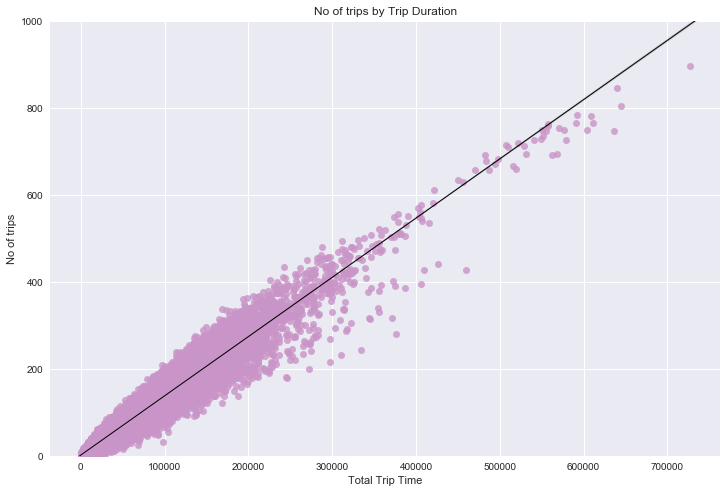

In [5]:
#plot Regression between No of trips and Total trip duration

plt.figure(figsize=(12,8))
sns.regplot(y="no_of_trips", x="total_trip_time", data=df_daily_trips, fit_reg = True, color='#c994c7', line_kws={"linewidth": 1, "color": "black"})
plt.xlabel("Total Trip Time")
plt.ylabel("No of trips")
plt.title("No of trips by Trip Duration")
_ = plt.ylim(0,1000)

plt.show()

**There is a strong liner relatonship between number of trips and total trip duration for a given day/station but there are many outliers displayed here.**

If we can remove outlier and correctly tune the model for preciting no fo trips, we will be easily able to predict the total trip duration also from same model. 


Text(0.5,1,'No of trips by Station id')

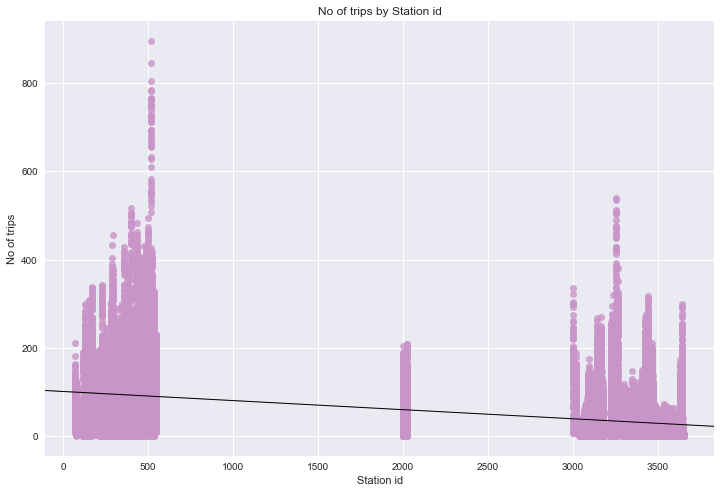

In [6]:
# Regression plot of Trip count againt Station id

plt.figure(figsize=(12,8))
sns.regplot(y="no_of_trips", x="start_id", data=df_daily_trips, fit_reg = True, color='#c994c7', line_kws={"linewidth": 1, "color": "black"})
plt.xlabel("Station id")
plt.ylabel("No of trips")
plt.title("No of trips by Station id")

**- Station with lower id (Manhattan) has high no of trips compared to other stattion with higher id values **

Text(0.5,1,'No of trips by Median user age')

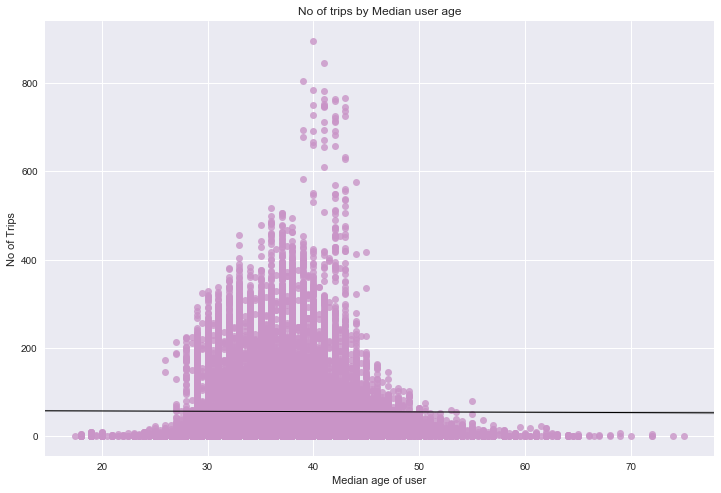

In [7]:
# Regression plot of Trip count againt median user Age

plt.figure(figsize=(12,8))
sns.regplot(y="no_of_trips", x="median_user_age", data=df_daily_trips, fit_reg = True, color='#c994c7', line_kws={"linewidth": 1, "color": "black"})
plt.xlabel("Median age of user")
plt.ylabel("No of Trips")
plt.title("No of trips by Median user age")


**- No significant variance except that we can see no fo trips are higher for age range 40-45 **

Text(0.5,1,'No of trips by Average daily Temp')

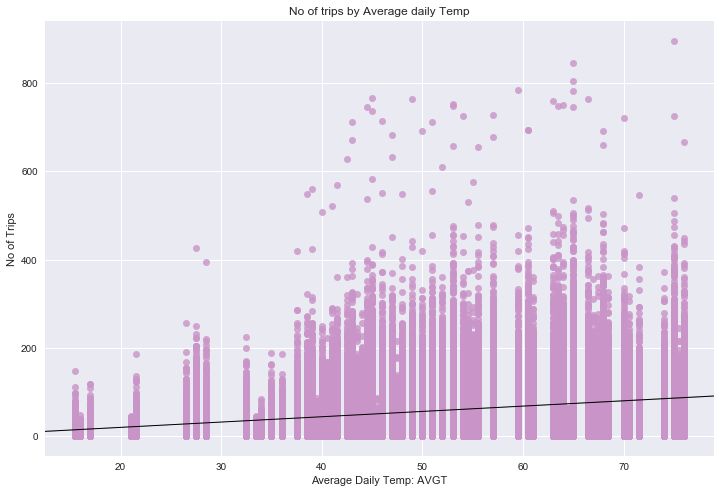

In [8]:
# Regression plot of Trip count againt Average temrature of the day

plt.figure(figsize=(12,8))
sns.regplot(y="no_of_trips", x="AVGT", data=df_daily_trips, fit_reg = True, color='#c994c7', line_kws={"linewidth": 1, "color": "black"})
plt.xlabel("Average Daily Temp: AVGT")
plt.ylabel("No of Trips")
plt.title("No of trips by Average daily Temp")


**- no of trips are increating when temprature increases **

Text(0.5,1,'No of trips by Day of the week')

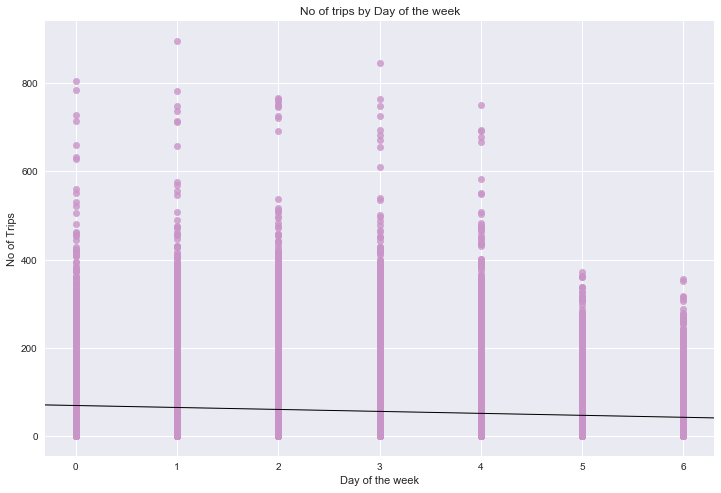

In [9]:
# Regression plot of Trip count againt Start Day temrature of the day

plt.figure(figsize=(12,8))
sns.regplot(y="no_of_trips", x="start_day", data=df_daily_trips, fit_reg = True, color='#c994c7', line_kws={"linewidth": 1, "color": "black"})
plt.xlabel("Day of the week")
plt.ylabel("tripduration log value")
plt.ylabel("No of Trips")
plt.title("No of trips by Day of the week")

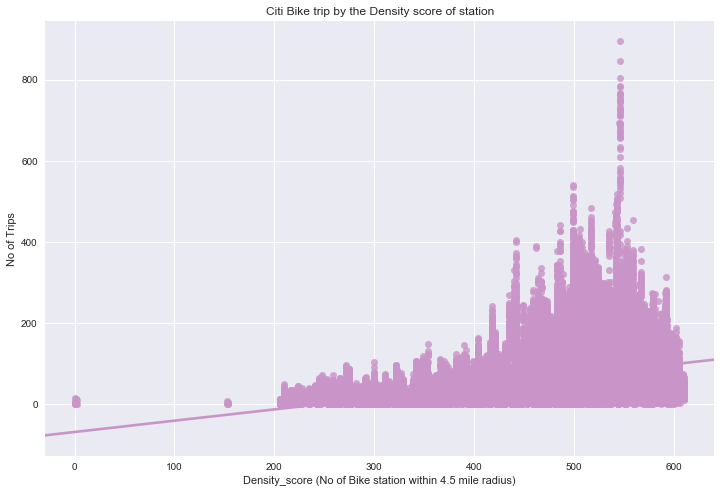

In [10]:
# Regression plot of Trip count againt Density Score
plt.figure(figsize=(12,8))

sns.regplot(x="density_score", y="no_of_trips", data=df_daily_trips, x_jitter=.3,  fit_reg = True, color='#c994c7');
_ = plt.xlabel('Density_score (No of Bike station within 4.5 mile radius)')
_ = plt.ylabel('No of Trips')
_ = plt.title('Citi Bike trip by the Density score of station')

plt.show()

**- High no of trips are observded where Station density is high **

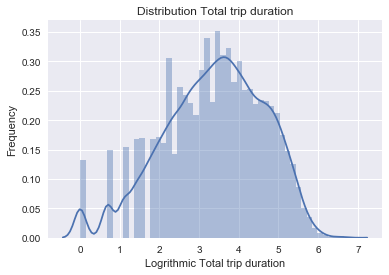

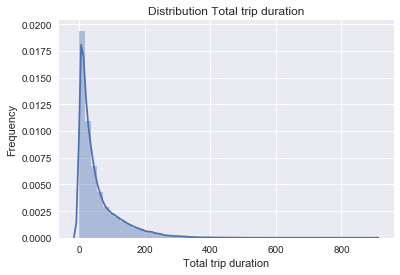

In [11]:
#plot Logrithemic distribution of trip duration.

sns.distplot(np.log(df_daily_trips.no_of_trips));

plt.title("Distribution Total trip duration")
plt.xlabel("Logrithmic Total trip duration")
plt.ylabel("Frequency")
plt.show()

sns.distplot(df_daily_trips.no_of_trips);

plt.title("Distribution Total trip duration")
plt.xlabel("Total trip duration")
plt.ylabel("Frequency")
plt.show()

In [12]:
#start with machine learning model, drop columns which are not needed to reduce size of kernel.

df_daily_trips.drop(['startdate'], axis=1, inplace=True)
df_daily_trips_new = df_daily_trips.drop(['total_trip_time', 'free_trip', 'paidunits', 'paidamount'], axis=1)

X = df_daily_trips_new.drop('no_of_trips', axis=1)
y = df_daily_trips_new.no_of_trips.values.reshape(-1,1)

# Split the dataframe in test and train Dataframes 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

X_train.reset_index(inplace=True)
#y_train = y_train.reset_index()

X_test.reset_index(inplace=True)
#y_test = y_test.reset_index()

print("Training set::{}{}".format(X_train.shape,y_train.shape))
print("Testing set::{}{}".format(X_test.shape, y_test.shape))

Training set::(46011, 10)(46011, 1)
Testing set::(19719, 10)(19719, 1)


Coefficients: 
 [[-5.24634403e-06 -5.24634404e-06  2.60563007e-04  1.04291019e+00
   8.09638485e-02 -1.21889875e-02  1.48345307e-01 -8.77340196e-04
  -9.02197023e-03 -3.13720952e-05]]
Mean squared error: 4.00
Variance score: 1.00
Estimated intercept coefficient: [8.10781944]
Number of coefficients: 1
MAE train: 1.142, test: 1.155
MSE train: 3.547, test: 3.995
R^2 train: 0.999, test: 0.999


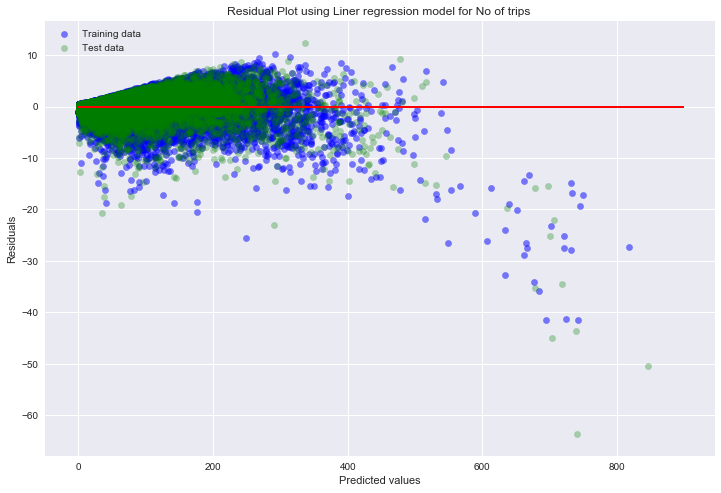

In [13]:
# Start LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print('Estimated intercept coefficient: {}'.format(reg.intercept_))

print('Number of coefficients: {}'.format(len(reg.coef_)))

#print('predict score:', y_pred)

print('MAE train: %.3f, test: %.3f' % (
    mean_absolute_error(y_train, reg.predict(X_train)),
    mean_absolute_error(y_test, y_pred)))
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, reg.predict(X_train)),
    mean_squared_error(y_test, y_pred)))
print('R^2 train: %.3f, test: %.3f' % (
    (r2_score(y_train, reg.predict(X_train)),
    r2_score(y_test, y_pred))))


# Plot the Residual of outputs
plt.figure(figsize=(12,8))

plt.scatter(reg.predict(X_train), reg.predict(X_train)-y_train, c='b', s=40, alpha = 0.5, label='Training data')
plt.scatter(y_pred, y_pred-y_test, c='g', s=40, alpha = 0.3, label='Test data')

plt.title("Residual Plot using Liner regression model for No of trips ")
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=900, lw=2, color='red')
plt.show()


** Residuals for Test data is more alinged towards zero compared to training data **
** but this is a overfitting probelem, R Square score is .99**

In [14]:
# Compute 3-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_test, y_test, cv=10)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.99920522 0.99918532 0.99918025 0.99918382 0.99925177 0.999265
 0.9988468  0.99892069 0.99895941 0.99929384]
Average 5-Fold CV Score: 0.9991292118874371


In [15]:
#Recursive feature elimination to repeatedly construct a model and choose either the best or worst performing feature
rfe = RFE(reg, 3)
fit = rfe.fit(X_test, y_test)

print("Num Features:", fit.n_features_)
print("Selected Features: ", fit.support_) 
print("Feature Ranking:", fit.ranking_)
print(sorted(zip(map(lambda x: round(x, 4), fit.ranking_), X.columns)))


Num Features: 3
Selected Features:  [False False False  True  True False  True False False False]
Feature Ranking: [8 7 5 1 1 2 1 4 3 6]
[(1, 'density_score'), (1, 'median_user_age'), (1, 'start_day'), (2, 'gender'), (3, 'Members'), (4, 'AVGT'), (5, 'no_of_bikes'), (7, 'start_id'), (8, 'Unnamed: 0')]


** Based on feature elimination for linear regression, top 3 feature are density_score, median_user_age and start_day **

Text(0.5,1,'No of trips vs Predicted No of Trips: $Y_i$ vs $\\hat{Y}_i$')

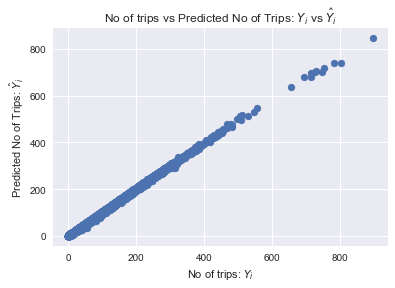

In [16]:
#plot predicted value v/s original value for test data

plt.scatter(y_test, y_pred)
plt.xlabel("No of trips: $Y_i$")
plt.ylabel("Predicted No of Trips: $\hat{Y}_i$")
plt.title("No of trips vs Predicted No of Trips: $Y_i$ vs $\hat{Y}_i$")


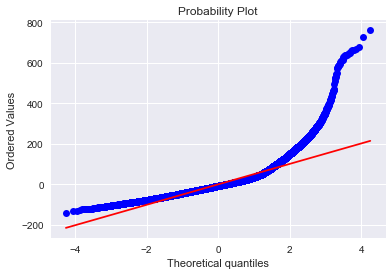

In [17]:
# plot probablity plot of the predicting correct output.

qq = probplot(df_daily_trips.no_of_trips - model2.fittedvalues, plot=plt)


The q-q plot shows that there is a positive skewness in the residual data also. The residual shouldnt have positive or negative skewness. This is another violation of the assumption in the linear model.

So it looks like the Residual plot is better to determin the results.

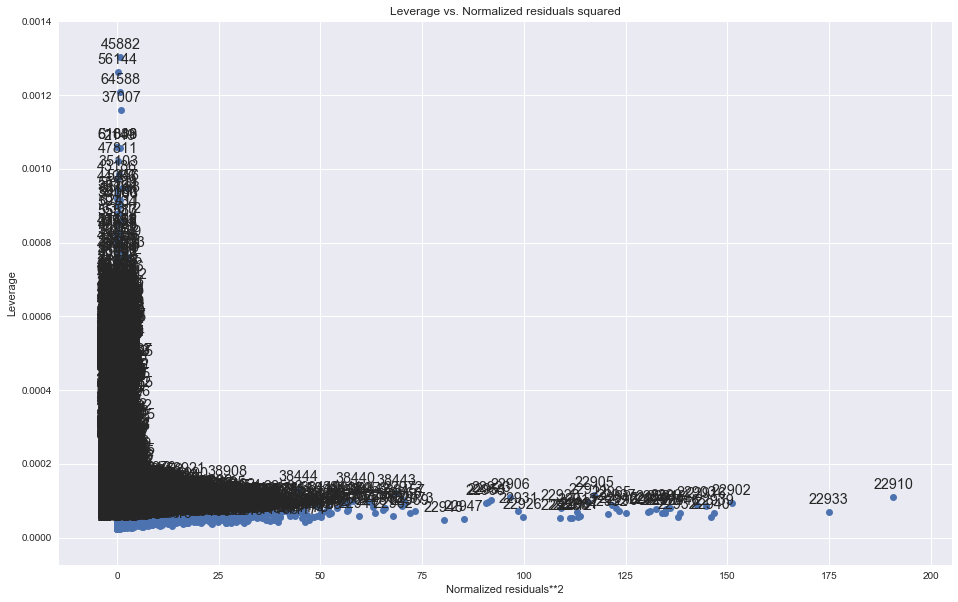

In [18]:
# Leverage Plot to see the level of deviations and distribution of outliers.

fig, ax = plt.subplots(figsize=(16,10))
fig = plot_leverage_resid2(model2, ax=ax, alpha=0.7)

Leverage: An observation with an extreme value on a predictor variable is called a point with high leverage. Leverage is a measure of how far an observation deviates from the mean of that variable. These leverage points can have an effect on the estimate of regression coefficients.

In [19]:
#We will drop outlier and high influencer manually first

%matplotlib inline

outl_index = [37006, 38324, 6631, 3237, 20702, 27825, 38358, 24463, 3288, 59481, 37020, 51220, 16699, 22910, 22933, 22902, 37005, 22916
             , 22940, 22903, 22939, 22959, 59687, 456, 43251, 38436, 59688, 59826, 32057, 5784, 5875, 51252, 5872]
hl_index = [38324, 6631, 3237, 27825, 38358, 20702, 51220, 3288, 56144, 45882, 64588, 456, 43248, 48946, 5849]
out_hl_index = list(set(outl_index + hl_index))

cols = ["start_id", "median_user_age", "density_score" ,"start_day", "AVGT", "gender", "Members", "no_of_trips", "total_trip_time"]
df = df_daily_trips[cols]

outlier_df = df.iloc[outl_index]
hl_df = df.iloc[hl_index]
out_hl_df = df.iloc[out_hl_index]


# Outliers and high leverage putting together to check influence.

print(hl_df)
print(outlier_df)

df = df.drop(df.index[list(set(hl_index+outl_index))])

       start_id  median_user_age  density_score  start_day  AVGT  gender  \
38324      3249             28.5            343          0  75.0     1.0   
6631        303             35.0            545          4  76.0     1.0   
3237        244             38.0            448          4  44.0     2.0   
27825      3062             33.0            439          6  75.5     1.0   
38358      3249             31.5            343          6  40.5     1.0   
20702       487             32.0            588          4  76.0     1.0   
51220      3427             36.0            556          1  26.5     1.0   
3288        245             36.5            462          5  67.5     1.0   
56144      3512             74.0            362          3  47.0     2.0   
45882      3363             72.0            332          6  47.5     0.0   
64588      3620             70.0            516          1  46.0     2.0   
456         119             75.0            481          6  36.0     1.0   
43248      3

In [20]:
#Create function to drop outliers for top 4 features.

def reject_outliers_AVGT(data):
    u = np.mean(data.AVGT)
    s = np.std(data.AVGT)
    data_filtered = data[(data.AVGT > u-2*s) & (data.AVGT < u+2*s)]
    return pd.DataFrame(data_filtered)

def reject_outliers_DS(data):
    u = np.mean(data.density_score)
    s = np.std(data.density_score)
    data_filtered = data[(data.density_score > u-2*s) & (data.density_score < u+2*s)]
    return pd.DataFrame(data_filtered)

def reject_outliers_TTT(data):
    u = np.mean(data.total_trip_time)
    s = np.std(data.total_trip_time)
    data_filtered = data[(data.total_trip_time > u-2*s) & (data.total_trip_time < u+2*s)]
    return pd.DataFrame(data_filtered)

def reject_outliers_age(data):
    u = np.mean(data.median_user_age)
    s = np.std(data.median_user_age)
    data_filtered = data[(data.median_user_age > u-2*s) & (data.median_user_age < u+2*s)]
    return pd.DataFrame(data_filtered)

In [21]:
# best features  'density_score' , 'gender', 'median_user_age', 'start_day', 'AVGT'
print(df.shape)

new_df = reject_outliers_AVGT(df)

new_df1 = reject_outliers_DS(new_df)

new_df2 = reject_outliers_TTT(new_df1)

new_df3 = reject_outliers_age(new_df2)

print("new_shape", new_df3.shape)

(65691, 9)
new_shape (56597, 9)


In [22]:
# Recheck the ols model with features 'Members', 'density_score', 'gender', 'median_user_age', 'start_day' , 'AVGT'

model3 = ols('no_of_trips ~ density_score + AVGT + start_day - 1', new_df3).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            no_of_trips   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                 2.943e+04
Date:                Sun, 25 Feb 2018   Prob (F-statistic):               0.00
Time:                        12:36:06   Log-Likelihood:            -2.9354e+05
No. Observations:               56597   AIC:                         5.871e+05
Df Residuals:                   56594   BIC:                         5.871e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
density_score     0.1284      0.001    100.925

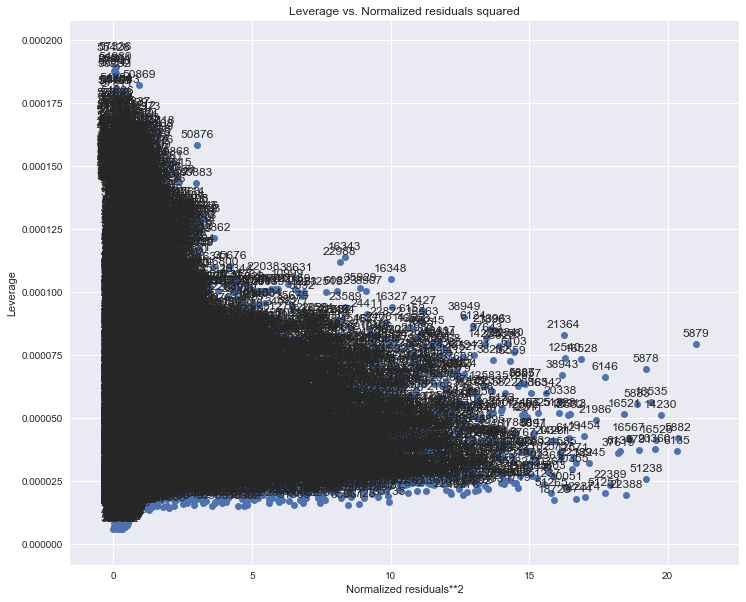

In [23]:
# Leverage Plot to see the level of deviations after removing outliers tuning

fig, ax = plt.subplots(figsize=(12,10))
fig = plot_leverage_resid2(model3, ax=ax, alpha=0.7)

###### Finalized features are :- 'density_score', 'start_id', 'start_day', 'AVGT'

In [24]:
# Recreate the test and train split after removing outliers.
# new data frame with features as 'density_score', 'start_id', 'start_day', 'AVGT'

daily_trips_newdf1 = new_df3.drop(['total_trip_time', 'gender', 'Members','median_user_age'], axis=1)

X = daily_trips_newdf1.drop('no_of_trips', axis=1)
y = daily_trips_newdf1.no_of_trips.values.reshape(-1,1)

# Split the dataframe in test and train Dataframes 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=44)

#X_train.reset_index(inplace=True)
#y_train = y_train.reset_index()

#X_test.reset_index(inplace=True)
#y_test = y_test.reset_index()

print("Training set::{}{}".format(X_train.shape,y_train.shape))
print("Testing set::{}{}".format(X_test.shape, y_test.shape))


Training set::(37919, 4)(37919, 1)
Testing set::(18678, 4)(18678, 1)


In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37919 entries, 9688 to 15835
Data columns (total 4 columns):
start_id         37919 non-null int64
density_score    37919 non-null int64
start_day        37919 non-null int64
AVGT             37919 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.4 MB


In [26]:
# performaing a eveluation of multiple models to see whcih has best outcome.

feature_list = list(X_train.columns)

ESTIMATORS = {
    "Decision Tree" : DecisionTreeRegressor(max_depth=10, min_samples_split=10, max_leaf_nodes=50),
    "Extra Trees" : ExtraTreesRegressor(n_estimators=10, max_features='auto'),
    "Gradient Boosting" : GradientBoostingRegressor(n_estimators=10, learning_rate=.05, loss='huber'),
    "Random Forest" : RandomForestRegressor(n_estimators = 10, oob_score = True)
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    print(name)
    estimator.fit(X_train, y_train)
    print('MAE train: %.3f, test: %.3f' % (
    mean_absolute_error(y_train, estimator.predict(X_train)),
    mean_absolute_error(y_test, estimator.predict(X_test))))
    
    print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, estimator.predict(X_train)),
    mean_squared_error(y_test, estimator.predict(X_test))))
    
    print('R^2 train: %.3f, test: %.3f' % (
    (r2_score(y_train, estimator.predict(X_train)),
    r2_score(y_test, estimator.predict(X_test)))))
    

    # Get numerical feature importances
    importances = list(estimator.feature_importances_)
    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Print out the feature and importances 
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Decision Tree
MAE train: 21.847, test: 22.045
MSE train: 946.017, test: 980.080
R^2 train: 0.587, test: 0.576
Variable: start_id             Importance: 0.63
Variable: density_score        Importance: 0.21
Variable: AVGT                 Importance: 0.11
Variable: start_day            Importance: 0.06
Extra Trees
MAE train: 0.480, test: 12.629
MSE train: 6.456, test: 400.614
R^2 train: 0.997, test: 0.827
Variable: start_id             Importance: 0.5
Variable: density_score        Importance: 0.29
Variable: AVGT                 Importance: 0.14
Variable: start_day            Importance: 0.07
Gradient Boosting
MAE train: 29.870, test: 29.904
MSE train: 1853.411, test: 1864.581
R^2 train: 0.190, test: 0.193
Variable: start_id             Importance: 0.7
Variable: density_score        Importance: 0.19
Variable: AVGT                 Importance: 0.07
Variable: start_day            Importance: 0.04
Random Forest
MAE train: 4.492, test: 10.993
MSE train: 57.326, test: 298.752
R^2 train: 0.975,

** Random forest regressor and Extra tree regressor provides a good R^2 score and lesser MSE**

** we will proceed further with these 2 models and tune them.**

In [27]:
#Tuning and Evealuation of Random forest regressor and Extra tree regressor                                   

# Models to try
models = {
    'RF': RandomForestRegressor( oob_score = True, max_features = 'auto'),
    'ETR': ExtraTreesRegressor( max_features='auto')
}

# Parameters to try (this is not an exahustive GridSearch)

params = {
    'RF': {'n_estimators' : [100, 500, 750],
            'max_depth': [9, 18],
            'min_samples_leaf': [1, 3],
            'max_features': [1.0, 0.5, 'sqrt']},
    'ETR': {'n_estimators' : [100, 500, 750], 
            'max_depth': [9, 18],
            'min_samples_leaf': [1, 3],
            'max_features': [1.0, 0.3]}
}

In [28]:
# Create class of function to try these models with various parameter options.
# P.S I have tried a lot of parameter combination but displaying here only a few which were most significant

class EstimatorSelectionHelper:
    
    """
    A helper class for running parameter grid search across different models. 
    It takes two dictionaries. The first contains the models to be scored. 
    The second contains the parameters for each model
    """
    
    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    
    
    def fit(self, X, y, cv=3, n_jobs=1, verbose=1, scoring=None, refit=False): 
        """
        fit(X,y) method runs a parameter grid search with cross validation for each model
        and for the given training data. If scoring=None, the score method of the estimator is used.
        """
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, 
                              verbose=verbose, scoring=scoring, refit=refit)
            gs.fit(X,y)
            self.grid_searches[key] = gs 
            
    
    
    def score_summary(self, sort_by='mean_score'):
        """
        After calling fit(X,y), the score_summary() method returns a df with a summary of the scores
        """
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
                }

            return pd.Series(dict(list( params.items()) + list(d.items() ))) #sum up two dicts
                      
        rows = [row(k, gsc.cv_validation_scores, gsc.parameters) 
                for k in self.keys
                for gsc in self.grid_searches[k].grid_scores_]
        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
        
        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]
        
        return df[columns]

In [29]:
# Call estimator and fit with the train and test data

helper = EstimatorSelectionHelper(models, params)
helper.fit(X_train, y_train, n_jobs=-1)

Running GridSearchCV for RF.
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 15.6min finished


Running GridSearchCV for ETR.
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  7.2min finished


In [30]:
#show the summary of score of all models / parameter combination in sorted order.

helper.score_summary()

,estimator,min_score,mean_score,max_score,std_score,max_depth,max_features,min_samples_leaf,n_estimators
20,RF,0.860231,0.862272,0.865897,0.00257005,18,1,1,750
19,RF,0.859586,0.862078,0.865974,0.00279037,18,1,1,500
18,RF,0.858473,0.860894,0.865445,0.00322003,18,1,1,100
22,RF,0.853443,0.855389,0.85898,0.00254238,18,1,3,500
23,RF,0.852499,0.855008,0.858903,0.00279175,18,1,3,750
21,RF,0.851061,0.854733,0.858726,0.00313751,18,1,3,100
25,RF,0.848059,0.849588,0.850363,0.00108156,18,0.5,1,500
26,RF,0.847991,0.849491,0.850621,0.00110512,18,0.5,1,750
31,RF,0.849077,0.849302,0.849716,0.000292859,18,sqrt,1,500
32,RF,0.848405,0.849163,0.84982,0.000582108,18,sqrt,1,750


######  Random forest regressior comes out as best model with the given set of paraemters. we will take this model and parameter set as baseline to evaluate the optimal output.

In [31]:
#create and Fit final tuned model for predicting no of trips from a station based on feature
#'density_score', 'start_id', 'start_day', 'AVGT'

reg =  RandomForestRegressor(n_estimators = 750, oob_score = True, random_state =42, 
                            max_depth = 18, min_samples_leaf=1, max_features = 'auto')

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('MAE train: %.3f, test: %.3f' % (
mean_absolute_error(y_train, reg.predict(X_train)),
mean_absolute_error(y_test, y_pred)))

print('MSE train: %.3f, test: %.3f' % (
mean_squared_error(y_train, reg.predict(X_train)),
mean_squared_error(y_test, y_pred)))

print('R^2 train: %.3f, test: %.3f' % (
(r2_score(y_train, reg.predict(X_train)),
r2_score(y_test, y_pred))))

x_train_pred = reg.predict(X_train)


MAE train: 5.427, test: 10.629
MSE train: 71.718, test: 279.644
R^2 train: 0.969, test: 0.879


######  R^2 value for train data is close to 97% and train data is 88% which is good but we can see Mean absolute error and mean Square error is high. 

This is because of 2 reasons:-
1. The scale of value we are predictin is high. no of trips from a station for a day can in range of 100-1000
2. The values are too many and not normally distributed as heavy traffic stattion have trips in thousand on warm days
    while on cold days soem stattion see trips as little as 10.
   
   
###### we will calculate the log of  mean Square error and Naturalized value in % based on range.

In [32]:
def rmsle(y_test, y_pred):
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean(np.power(np.log1p(y_test)-np.log1p(y_pred), 2)))

In [33]:

print("RMSE : Root mean Square value",np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSLE : Root mean Square log value",rmsle(y_test, y_pred))
print("NMSLE : Naturalized mean Square value", np.sqrt(mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)))


RMSE : Root mean Square value 16.722547170280063
RMSLE : Root mean Square log value 1.4453958839436873
NMSLE : Naturalized mean Square value [0.06770262]


** Naturalized error is .0677 or 6.7% **

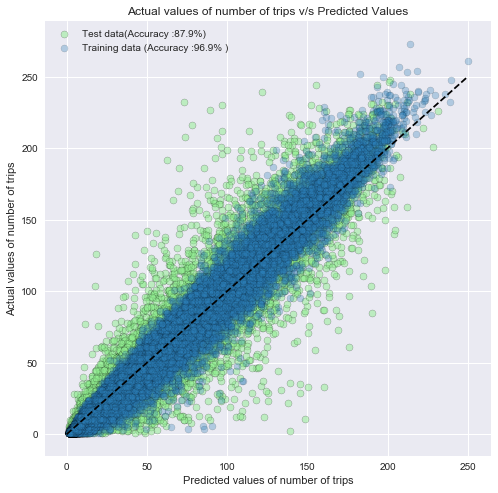

In [34]:
#plt.scatter(reg.predict(X_train), reg.predict(X_train)-y_train,c='blue', marker='x', label='Training data')

plt.figure(figsize=(8,8))

plt.scatter(y_pred, y_test,
           c='lightgreen', marker='o',alpha =0.5, label='Test data(Accuracy :87.9%)', edgecolor='black')
plt.scatter(x_train_pred, y_train,
           c='#2c7fb8', marker='o',alpha =0.3, label='Training data (Accuracy :96.9% )', edgecolor='black')
plt.plot([0, 250], [0, 250], 'k--', color="black",)
plt.xlabel('Predicted values of number of trips')
plt.ylabel('Actual values of number of trips')
plt.title('Actual values of number of trips v/s Predicted Values')
plt.legend(loc='upper left')

#plt.line(ymin=0, xmin=-10, ymax=250, xmax=250, lw=2, color='red')
plt.show()

###### Final outcome-

Based on Machine Learning exercise we can predict the no of trips from a station with 87% accuracy.

The no of trips can be predicted by providing the values of Station id, Average temperature,  station density score and Day of the week.

Most important feature for prediction is Station id with 50% importance.

-------------------------------------------------------------------------
Random Forest Regressor was used as best Machine learning model.

After tuning, train data prediction accuracy was 97% and test data prediction accuracy was 87%.

CitiBike trip data volume is huge and it has high variance in distribution as not all places have an equal footprint of bike riders.

Naturalized mean Square error value was only  0.06770262
